## Classification Prediction based on Reviews
Final Project Idame Kinanti - JCDS Purwadhika JKT Batch 07

        Bisakah memprediksi sebuah klasifikasi hanya berdasarkan reviews yang ditulis oleh konsumen?

Pada Final Project ini saya menggunakan dataset dari <b>Kaggle</b> mengenai Women Clothing Reviews.

Dataset ini mengandung informasi tentang:

- Umur Customer - Age
- Penilaian Customer – Title, Review Text, Rating, Recommended Index, Positive Feedback Count
- Keterangan untuk item clothing - Division Name, Department Name, Class Name, Clothing ID

<b> Deskripsi Kolom  </b>
- Clothing ID: Integer Categorical variable that refers to the specific piece being reviewed.
- Age: Positive Integer variable of the reviewers age.
- Title: String variable for the title of the review.
- Review Text: String variable for the review body.
- Rating: Positive Ordinal Integer variable for the product score granted by the customer from 1 Worst, to 5 Best.
- Recommended IND: Binary variable stating where the customer recommends the product where 1 is recommended, 0 is not recommended.
- Positive Feedback Count: Positive Integer documenting the number of other customers who found this review positive.
- Division Name: Categorical name of the product high level division.
- Department Name: Categorical name of the product department name.
- Class Name: Categorical name of the product class name.

In [1]:
# Data visualisation #
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Data handling and processing #
import pandas as pd
import numpy as np
import re
import string
import nltk
from nltk.corpus import stopwords

# Model preparation #
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

# TextBlob #
from textblob import TextBlob
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('women-clothing.csv')
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
Unnamed: 0                 23486 non-null int64
Clothing ID                23486 non-null int64
Age                        23486 non-null int64
Title                      19676 non-null object
Review Text                22641 non-null object
Rating                     23486 non-null int64
Recommended IND            23486 non-null int64
Positive Feedback Count    23486 non-null int64
Division Name              23472 non-null object
Department Name            23472 non-null object
Class Name                 23472 non-null object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


In [4]:
df.describe(exclude='number').T

,count,unique,top,freq
Title,19676,13993,Love it!,136
Review Text,22641,22634,Perfect fit and i've gotten so many compliment...,3
Division Name,23472,3,General,13850
Department Name,23472,6,Tops,10468
Class Name,23472,20,Dresses,6319


In [5]:
#BikinNamaColumn
col = ['dataFeatures','dataType','null','nullPct','unique','uniqueSample']

#Bikin Isi Column
all_cont = []
for i in range(len(df.columns)):
    content = []
    content.append(df.columns[i])
    content.append(df[df.columns[i]].dtypes)
    content.append(df[df.columns[i]].isna().sum())
    content.append(round((df[df.columns[i]].isna().sum()/len(df[df.columns[i]])*100),2))
    content.append(df[df.columns[i]].nunique())
    content.append(df[df.columns[i]].drop_duplicates().sample(2).values)
    all_cont.append(content)
    i+=1

#Bikin Index
ind =list(range(0,len(df.columns)))

#BikinDataFrameBaru
dfDesc = pd.DataFrame(all_cont,ind,col)
dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,Unnamed: 0,int64,0,0.00,23486,"[3866, 7512]"
1,Clothing ID,int64,0,0.00,1206,"[1008, 742]"
2,Age,int64,0,0.00,77,"[81, 45]"
3,Title,object,3810,16.22,13993,"[Bought every color, Very pretty but different..."
4,Review Text,object,845,3.60,22634,"[Love this top! it has a great retro vibe, and..."
5,Rating,int64,0,0.00,5,"[2, 5]"
6,Recommended IND,int64,0,0.00,2,"[0, 1]"
7,Positive Feedback Count,int64,0,0.00,82,"[10, 82]"
8,Division Name,object,14,0.06,3,"[General Petite, Initmates]"
9,Department Name,object,14,0.06,6,"[Intimate, Tops]"


## 1. Finding Insights

Pertama-tama saya coba mengeksplor dataset di atas untuk menemukan beberapa insights.

In [6]:
sns.set_style(style='whitegrid')

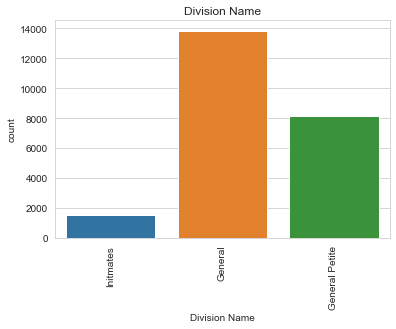

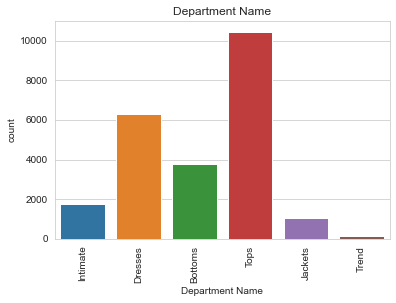

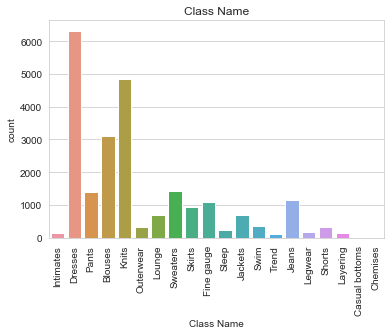

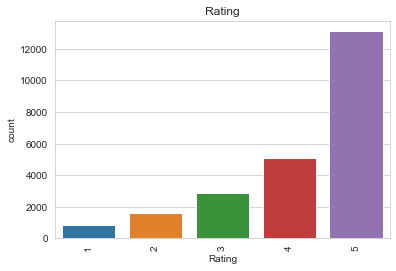

In [7]:
df_categorical = ['Division Name', 'Department Name', 'Class Name','Rating']

# VISUALIZE CAT COl #
for i in df_categorical:
    sns.countplot(data=df, x=i)
    plt.title(i)
    plt.xticks(rotation=90)
    plt.show()

<b>Insights</b>:
- Top Division : General
- Top Department : Tops
- Top 3 Class : Dresses, Knits, Blouse
- Top rating : 5

Marketplace/Toko Baju ini memiliki rating yang cukup baik dari konsumennya.

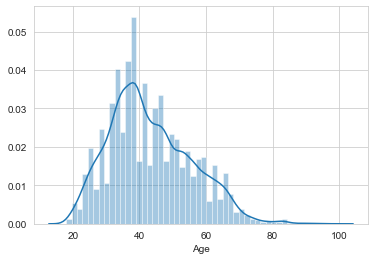

In [8]:
sns.distplot(df['Age'])
plt.show()

In [9]:
df['Age'].describe()

count    23486.000000
mean        43.198544
std         12.279544
min         18.000000
25%         34.000000
50%         41.000000
75%         52.000000
max         99.000000
Name: Age, dtype: float64

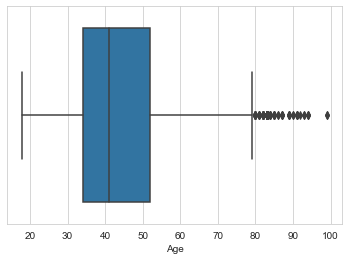

In [10]:
sns.boxplot(df['Age'])

<b>Insights</b>: Berdasar data di atas, ditemukan range umur customer: 18 - 99 tahun.

In [11]:
df[(df['Age']>=79) & (df['Age']<=99)]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
95,95,863,83,Casual elegance!,"Purchased this top online, and when i received...",5,1,14,General,Tops,Knits
234,234,840,83,Pretty but runs large!,I ordered this top in my usual size and am exc...,5,1,0,General,Tops,Blouses
277,277,868,83,Sooooooooo cute!,"Love this top!\nit is a full/ swing top, but t...",5,1,1,General,Tops,Knits
628,628,1059,80,Please restock!!!,These sold out in my size 16 before i even kne...,5,1,6,General,Bottoms,Pants
659,659,252,93,Amazing suit!,"This is by far the cutest, most glamorous one ...",5,1,3,Initmates,Intimate,Swim
...,...,...,...,...,...,...,...,...,...,...,...
22640,22640,1094,80,Fantastic product,This arrived today and i am thrilled with it. ...,5,1,8,General Petite,Dresses,Dresses
22716,22716,1087,87,NaN,This dress fits great and is very warm for the...,4,1,0,General Petite,Dresses,Dresses
22773,22773,949,83,Scottish classic,Received this jacket yesterday...and it is lov...,5,1,0,General,Tops,Sweaters
23001,23001,298,83,Beautiful twist on a classic,I found this top to be very beautiful and well...,5,1,3,General Petite,Intimate,Lounge


Saya coba meneumkan insight lain dengan memisahkan kategori umur menjadi:
- Young Adult (18-25 tahun)
- Adult (26-35 tahun)
- Middle-Aged (36-50 tahun)
- Old (> 50 tahun)

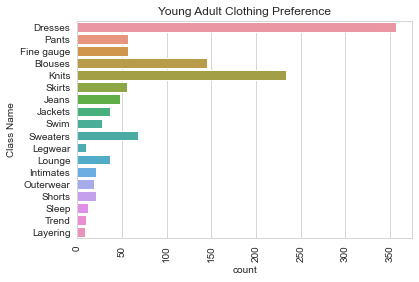

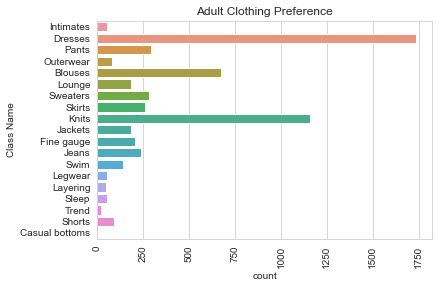

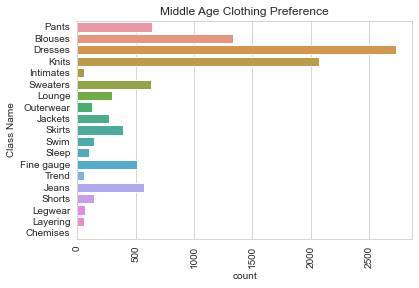

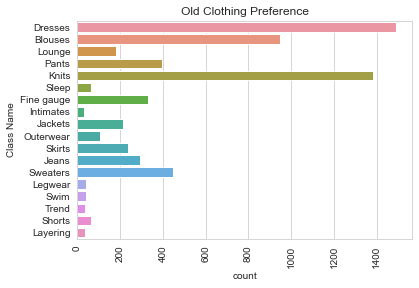

In [12]:
young_adult = df[(df['Age']>=17) & (df['Age']<26)]
adult = df[(df['Age']>=26) & (df['Age']<36)]
middle_age = df[(df['Age']>=36) & (df['Age']<51)]
old = df[(df['Age']>50)]

customer_by_age = [young_adult, adult, middle_age, old]
title_name = ['Young Adult', 'Adult', 'Middle Age', 'Old']

for i,num in zip(customer_by_age,title_name):
    sns.countplot(data=i, y='Class Name')
    plt.xticks(rotation=90)
    plt.title(f"{num} Clothing Preference")
    plt.show()

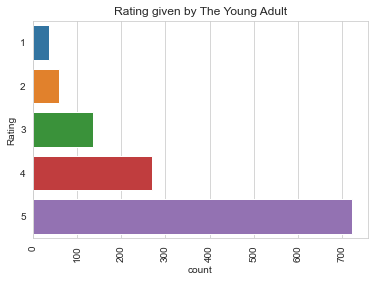

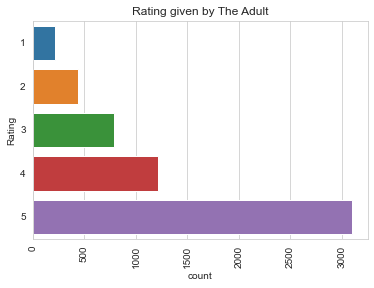

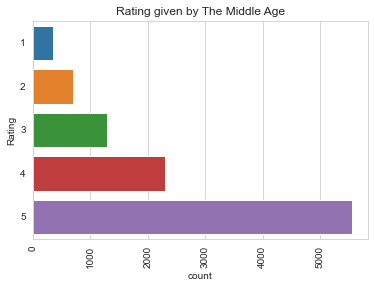

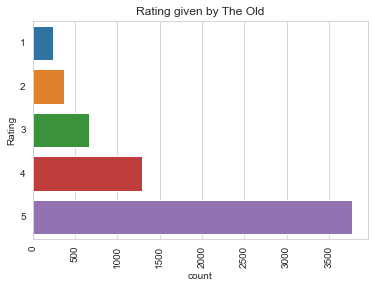

In [13]:
customer_by_age = [young_adult, adult, middle_age, old]
title_name = ['Young Adult', 'Adult', 'Middle Age', 'Old']

for i,num in zip(customer_by_age,title_name):
    sns.countplot(data=i, y='Rating')
    plt.xticks(rotation=90)
    plt.title(f"Rating given by The {num}")
    plt.show()

<b> Insight </b> :
- Ditemukan bahwa pada masing-masing kategori umur, TOP 3 Clothing Item yang dibeli adalah: Dresses, Knits, and Blouses.
- Pembelian celana Jeans cenderung rendah di kategori young adult and adult, pembelian tertinggi customer kategori middle age
- Semua kategori umur umumnya memberikan rating 5

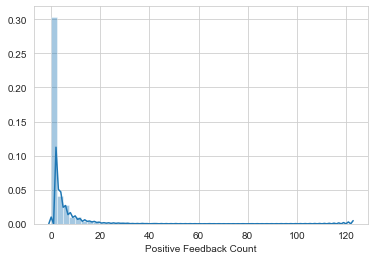

In [14]:
sns.distplot(df['Positive Feedback Count'])
plt.show()

In [15]:
df['Positive Feedback Count'].describe()

count    23486.000000
mean         2.535936
std          5.702202
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max        122.000000
Name: Positive Feedback Count, dtype: float64

<b> Insight </b> :
- Average jumlah Positive Feedback adalah 2.5 (2-3 vote)
- Tapi ada juga jumlah vote yang mencapai 122.

In [16]:
df[df['Positive Feedback Count']==122]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
7218,7218,1092,34,Beware if you're fuller in the chest,I loved the lace detailing all over this dress...,3,1,122,General,Dresses,Dresses


In [17]:
df[df['Positive Feedback Count']==122]['Review Text'].iloc[0]

"I loved the lace detailing all over this dress and the fact it had pockets and was mostly cotton. it just looked so inviting, so i grabbed two sizes to try on (10 & 12) that 99% of the time fit me with retailer clothes. here are my thoughts:\n__________\npros:\n- lace detailing is lovely all over.\n- everything runs tts except at the bust (see below).\n- breathable fabric, comfortable.\n_________\ncons:\n- i'm a 36c and could not button the top two buttons of this dress in a size 10 (i'm 5'9, hourglass, a"

<i> Mencoba Mencari Insight dari Panjang Review (Title, Review Text, Total) </i>

In [18]:
def count_len(cols):
    try:
        return len(cols)
    except:
        return 0

df['Title Character Count'] = df['Title'].apply(count_len)
df['Review Character Count'] = df['Review Text'].apply(count_len)
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Character Count,Review Character Count
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,16,124
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,16,192


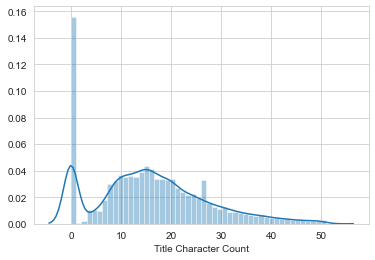

In [19]:
sns.distplot(df['Title Character Count'])

In [20]:
df['Title Character Count'].describe()

count    23486.000000
mean        15.998808
std         11.244639
min          0.000000
25%          9.000000
50%         15.000000
75%         23.000000
max         52.000000
Name: Title Character Count, dtype: float64

<b> Insight </b> :
- Average Panjang Karakter pada Judul = 15 karakter
- Max Panjang Karakter 52

In [21]:
df[df['Title Character Count']==52]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Character Count,Review Character Count
9567,9567,1095,36,So disappointed in retailer's descriptions lat...,And this one proved to be no different. the sh...,2,0,6,General Petite,Dresses,Dresses,52,500
13472,13472,1125,49,Buttons have not been fixed despite retailer's...,"Despite retailer's claim that they have ""fixed...",2,0,4,General Petite,Jackets,Outerwear,52,504
22873,22873,1066,37,Another example of retailer quality going down...,These pants look nice and are comfortable but ...,1,0,0,General Petite,Bottoms,Pants,52,499


In [22]:
df[df['Title Character Count']==52]['Title'].iloc[0]

"So disappointed in retailer's descriptions lately..."

In [23]:
df[df['Title Character Count']==52]['Title'].iloc[1]

"Buttons have not been fixed despite retailer's claim"

In [24]:
df[df['Title Character Count']==52]['Title'].iloc[2]

'Another example of retailer quality going downhill..'

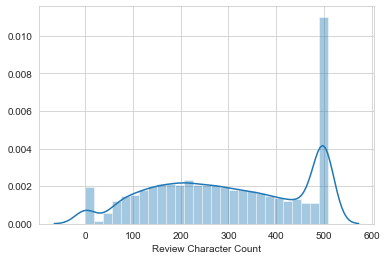

In [25]:
sns.distplot(df['Review Character Count'])

In [26]:
df['Review Character Count'].describe()

count    23486.000000
mean       297.581666
std        152.572686
min          0.000000
25%        173.000000
50%        292.000000
75%        451.000000
max        508.000000
Name: Review Character Count, dtype: float64

<b> Insight </b> :
- Average Panjang Karakter pada Review = 297 karakter
- Max Panjang Karakter 508

In [27]:
df[df['Review Character Count']==508]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Character Count,Review Character Count
17597,17597,824,52,Busty? curvy? no problem!,I adore this blouse. the colors are vibrant (s...,5,1,0,General Petite,Tops,Blouses,25,508
19304,19304,1103,91,I don't understand this dress,I have been continually disappointed in retail...,1,0,3,General,Dresses,Dresses,29,508


In [28]:
df[df['Review Character Count']==508]['Review Text'].iloc[0]

'I adore this blouse. the colors are vibrant (see my photo below). this is one of my favorite purchases from retailer. the top is light weight. true to size. i ordered a petite small and am 5 feet tall 120 lbs. and curvy. i left it untucked and loose like in the photo and it was very flattering. i disagree about it being frumpy. i wore it with kelly green retailer brand slacks paired with the retailer yellow sweater coat with white piping, and the retailer moss suede cross bag and neutral color (nude) fl'

In [29]:
df[df['Review Character Count']==508]['Review Text'].iloc[1]

"I have been continually disappointed in retailer's clothing for the past year. i feel like their prices have soared and the quality has remained so-so, but dresses like these somehow make the cut. it does not make sense. since when did retailer exclusively market to older women? no, retailer's market has always been young adults. this dress is extremely matronly. although the bottom print is nice, the hot pink belt?? is completely mismatched and gaudy. i really hope retailer starts curating better dress"

In [30]:
# Total Review Length #
df['Total Review Length'] = df['Title Character Count'] + df['Review Character Count']
df.head(3)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Character Count,Review Character Count,Total Review Length
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,0,53,53
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,0,303,303
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,23,500,523


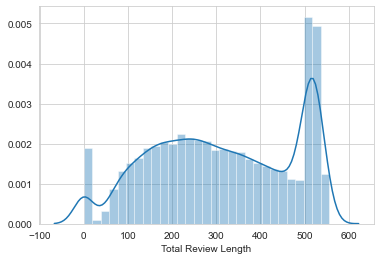

In [31]:
sns.distplot(df['Total Review Length'])

In [32]:
df['Total Review Length'].describe()

count    23486.000000
mean       313.580473
std        156.789654
min          0.000000
25%        187.000000
50%        308.000000
75%        469.000000
max        556.000000
Name: Total Review Length, dtype: float64

<b> Insight </b> :
- Average Panjang Total Karakter (Title + Review) = 313 karakter
- Max Panjang karakter = 556

In [33]:
df[df['Total Review Length']==556]

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Title Character Count,Review Character Count,Total Review Length
13472,13472,1125,49,Buttons have not been fixed despite retailer's...,"Despite retailer's claim that they have ""fixed...",2,0,4,General Petite,Jackets,Outerwear,52,504,556


In [34]:
print(df[df['Total Review Length']==556]['Title'].iloc[0])
print(df[df['Total Review Length']==556]['Review Text'].iloc[0])

Buttons have not been fixed despite retailer's claim
Despite retailer's claim that they have "fixed" the button issue on this coat, beware. they haven't. i ordered this coat november 18th, feeling safe that the issue that scores of other reviewers had noted was fixed, because retailer indicated "rest assured, this issue has been fixed" (as noted in the item description). feeling confident that i'd get a non-defective coat at this late date in the quality assurance cycle, i was severely disappointed to open my shipment tonight (nov 24th) immediately di


In [35]:
#melihat perbedaan panjang review + title, dengan feature recommended IND#
df_0 = df[df['Recommended IND']==0]
df_1 = df[df['Recommended IND']==1]

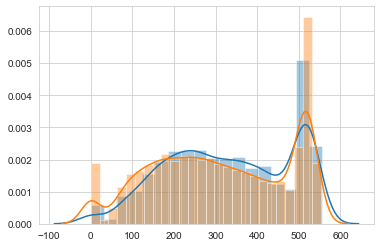

In [36]:
sns.distplot(df_0[['Total Review Length']])
sns.distplot(df_1[['Total Review Length']])

In [37]:
#coba describe#
df_0['Total Review Length'].describe()

count    4172.000000
mean      330.274449
std       146.147329
min         0.000000
25%       213.000000
50%       328.000000
75%       474.000000
max       556.000000
Name: Total Review Length, dtype: float64

In [38]:
#coba describe#
df_1['Total Review Length'].describe()

count    19314.000000
mean       309.974423
std        158.768178
min          0.000000
25%        181.000000
50%        304.000000
75%        467.750000
max        552.000000
Name: Total Review Length, dtype: float64

In [178]:
df_rc = df.groupby(['Recommended IND'])
df_rc['Total Review Length'].mean()

Recommended IND
0    330.274449
1    309.974423
Name: Total Review Length, dtype: float64

<b>Insights</b>: Average total panjang review antara review yg recommended dengan yg tidak recommended tidak jauh berbeda dengan skor masing-masing 330 dan 309 kata. Tidak ditemukan pola misalnya apakah review yang buruk biasanya lebih panjang, atau sebaliknya review yang baik lebih panjang.

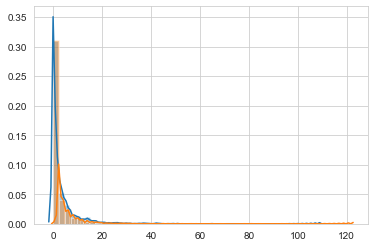

In [176]:
sns.distplot(df_0[['Positive Feedback Count']])
sns.distplot(df_1[['Positive Feedback Count']])

In [177]:
df_rc = df.groupby(['Recommended IND'])
df_rc['Positive Feedback Count'].mean()

Recommended IND
0    3.383030
1    2.352956
Name: Positive Feedback Count, dtype: float64

<b>Insights</b>: Average feedback count antara review yg recommended dengan yg tidak recommended tidak jauh berbeda dengan skor masing-masing 3.3 dan 2.3. Review item yang buruk sedikit lebih banyak mendapat feedback dari konsumen lain.

In [39]:
# Explore pattern of Null Review #
null_review = df[df['Total Review Length']==0]
len(null_review)

844

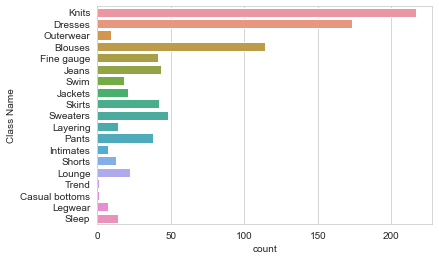

In [40]:
sns.countplot(data=null_review, y='Class Name')

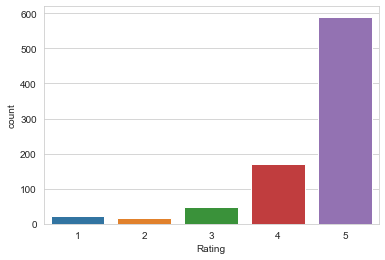

In [41]:
sns.countplot(null_review['Rating'])

<b>Insights</b>: Null review paling banyak ditemukan pada review item Knits, Dresses, and Blouse. Hanya saja meski konsumen tidak menuliskan review, konsumen memberikan rating 5. Konsumen tidak menulis review bukan karena item tersebut buruk.

## 2. Text Preprocessing

Data yang diperlukan untuk membuat model prediksi berdasarkan review adalah feature yang memiliki data text. Untuk itu perlu pengolahan lebih lanjut sebelum data text ini bisa diproses pada model. Untuk memudahkan proses cleaning dan text-preparation, saya membuat dataframe baru dengan memilih feature yang akan digunakan yaitu feature Recommended IND sebagai target prediksi nantinya, serta data text yaitu Review Text dan Title.

In [42]:
data = df.copy()

# selecting features #
data = data[['Recommended IND', 'Title', 'Review Text']]
data.head()

,Recommended IND,Title,Review Text
0,1,NaN,Absolutely wonderful - silky and sexy and comf...
1,1,NaN,Love this dress! it's sooo pretty. i happene...
2,0,Some major design flaws,I had such high hopes for this dress and reall...
3,1,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl..."
4,1,Flattering shirt,This shirt is very flattering to all due to th...


Sebelumnya ditemukan bahwa feature yang memiliki data text (Title dan Reviews) tersebut memiliki null-data. Berikut saya coba melihat pattern dari null-data pada feature Title dan Review Text.

In [43]:
#Melihat Null Value di feature Title
data[data['Title'].isna()]

,Recommended IND,Title,Review Text
0,1,NaN,Absolutely wonderful - silky and sexy and comf...
1,1,NaN,Love this dress! it's sooo pretty. i happene...
11,1,NaN,This dress is perfection! so pretty and flatte...
30,1,NaN,Beautifully made pants and on trend with the f...
36,1,NaN,This is a comfortable skirt that can span seas...
...,...,...,...
23450,0,NaN,I wanted to love this jacket. so soft and grea...
23453,1,NaN,"I am 5' 2"" about 118 lbs. thought this fit rea..."
23458,1,NaN,This is my new favorite sweater. it is lightwe...
23470,1,NaN,NaN


In [44]:
#Melihat Null Value di feature Review Text
data[data['Review Text'].isna()]

,Recommended IND,Title,Review Text
92,1,NaN,NaN
93,1,NaN,NaN
98,1,NaN,NaN
135,1,NaN,NaN
142,1,NaN,NaN
...,...,...,...
23258,1,NaN,NaN
23301,1,NaN,NaN
23303,1,NaN,NaN
23470,1,NaN,NaN


In [45]:
#Melihat Null Value di feature Review Text dan Title
data[data['Review Text'].isna() & data['Title'].isna()]

,Recommended IND,Title,Review Text
92,1,NaN,NaN
93,1,NaN,NaN
98,1,NaN,NaN
135,1,NaN,NaN
142,1,NaN,NaN
...,...,...,...
23258,1,NaN,NaN
23301,1,NaN,NaN
23303,1,NaN,NaN
23470,1,NaN,NaN


Ditemukan bahwa tidak semua null Title memiliki null Review, (Jumlah Null Title lebih banyak dari Null Review). Sehingga sebagai solusinya, saya akan mencoba menggabungkan feature Title dan Review Text menjadi satu. Hal ini untuk memudahkan analisis dan mengurangi jumlah null data yang tidak dapat dipakai.

In [46]:
#Mengubah nan menjadi string kosong#
def change_nan(cols):
    var = str(cols)
    if var == 'nan':
        return ''
    else:
        return var
data['Title'] = data['Title'].apply(change_nan)

In [47]:
#menggabungkan feature Title dan Review
data['Review Text'] = data['Title'] + ' ' + data['Review Text']

#drop feature Title
data.drop('Title', inplace=True, axis=1)

#rename columns biar mudah penulisan#
data.rename(columns = {'Recommended IND':'Recommend'}, inplace = True)
data.head()

,Recommend,Review Text
0,1,Absolutely wonderful - silky and sexy and com...
1,1,Love this dress! it's sooo pretty. i happen...
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...


Setelah menggabungkan data text, saya coba cek kembali apakah masih ada text yang kosong. Jika masih ada kolom yang tidak memiliki review / data text akan saya drop karena tidak bisa diolah juga di proses berikutnya.

In [48]:
data['Review Text'].isna().sum()

845

In [49]:
#DROPPING 845 NAN in Review Text Feature #
data = data[~data['Review Text'].isna()]
data['Review Text'].isna().sum()

0

In [50]:
data.head()

,Recommend,Review Text
0,1,Absolutely wonderful - silky and sexy and com...
1,1,Love this dress! it's sooo pretty. i happen...
2,0,Some major design flaws I had such high hopes ...
3,1,"My favorite buy! I love, love, love this jumps..."
4,1,Flattering shirt This shirt is very flattering...


In [51]:
len(data)

22641

In [52]:
#SAMPLING DATA menjadi 5000 sample
#karena laptop nggak kuat prosesnya

data = data.sample(5000)

### Noise Reduction

Selanjutnya, untuk membuat model prediksi, text masih perlu diolah. Kali ini saya mencoba mengolah text di atas melalui berbagai tahapan, yang pertama ada menghilangkan noise dari text, yang akan saya lakukan diantaranya adalah:

- Koreksi spelling
- Mengubah kata menjadi lowercase
- Koreksi kelebihan spasi di awal/akhir kalimat
- Menghilangkan tanda baca dan angka
- Menghilangkan stopwords

In [53]:
### SKIP ###
## Trial and Error ##

# tes = """I'm nthng but a gret human"""
# tes = TextBlob(tes).correct()
# tes

# string.punctuation
# string.digits

In [54]:
stopwords.words('english')[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [55]:
'not' in stopwords.words('english')

True

In [56]:
stop = stopwords.words('english')
stop.remove('not')

In [57]:
'not' in stop

False

In [58]:
#adding some words to stopwords#
#because still finding typo stopwords in text ex: havent, dont, etc#

new_stopwords = []
for item in stop:
    new_words = [char for char in item if char not in string.punctuation]
    new_words = ''.join(new_words)
    new_stopwords.append(new_words)

new_stopwords.append("im")
new_stopwords.append("i'm")
new_stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', 'youre']

In [59]:
# Cleaning Text #

def clean_text(text):    
    
    #make lowercase
    clean_text = text.lower()

    #remove punctuation and numbers#
    clean_text = [char for char in clean_text if char not in string.punctuation]
    clean_text = [char for char in clean_text if char not in string.digits]
    clean_text = ''.join(clean_text)
    
    #remove spasi kelebihan di depan/akhir review#
    clean_text = clean_text.strip()
    
    #Spelling Correction#
    clean_text = TextBlob(clean_text).correct()

    #remove stopwords#
    clean_text = [word for word in clean_text.split(' ') if word not in stop]
    clean_text = [word for word in clean_text if word not in new_stopwords]
    
    #make it whole again#
    clean_text = ' '.join(clean_text)
    return clean_text

In [60]:
## SKIP ###
# Trial and Error ##

tes = """I'm nthng but not gret12 human8 898"""
tes = clean_text(tes)
tes

'nothing not great human'

In [61]:
# Take a while............. #
# applying function into feature Review Text #

data['Text'] = data['Review Text'].apply(clean_text)
data.head()

,Recommend,Review Text,Text
10074,1,Pricey but bam! These jeans look amazing on! h...,prices jeans look amazing hug every curve righ...
13822,1,Goes with everything This is a beautifully mad...,goes everything beautifully made jacket ended ...
20657,1,"I wear size 8 , ordered a medium, fits great....",wear size ordered medium fits great nice qua...
18072,1,I love these jeans. the fit is much better th...,love jeans fit much better white micro happen ...
14045,0,Looks better in photos- returning immediately ...,looks better photo returning immediately high ...


In [62]:
data['Text']

10074    prices jeans look amazing hug every curve righ...
13822    goes everything beautifully made jacket ended ...
20657    wear size   ordered medium fits great nice qua...
18072    love jeans fit much better white micro happen ...
14045    looks better photo returning immediately high ...
                               ...                        
14538    love would buy every color incredibly soft sty...
12702    mad plaidthis dress new favorite ill tell pict...
21301    gorgeous dress ill fitting bought size small d...
463      cut slip body hugging ordered white really nic...
2159     lovely color ordered either stylish pick top r...
Name: Text, Length: 5000, dtype: object

### Sentiment Detection using Polarity Test
Saya mencoba melihat sentiment review dengan test Polarity, lalu melihat score Sentimentnya.

In [63]:
def check_sentiment(text):
    score= TextBlob(text).sentiment.polarity
    return score
data['Polarity'] = data['Text'].apply(check_sentiment)

In [64]:
data.head()

,Recommend,Review Text,Text,Polarity
10074,1,Pricey but bam! These jeans look amazing on! h...,prices jeans look amazing hug every curve righ...,0.268571
13822,1,Goes with everything This is a beautifully mad...,goes everything beautifully made jacket ended ...,0.203571
20657,1,"I wear size 8 , ordered a medium, fits great....",wear size ordered medium fits great nice qua...,0.466667
18072,1,I love these jeans. the fit is much better th...,love jeans fit much better white micro happen ...,0.232727
14045,0,Looks better in photos- returning immediately ...,looks better photo returning immediately high ...,-0.189000


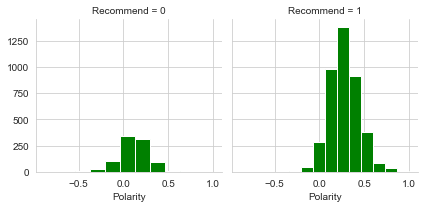

In [65]:
g = sns.FacetGrid(data, col="Recommend")
g = g.map(plt.hist, "Polarity", color="g")

In [66]:
recommend = data.groupby(['Recommend'])
recommend['Polarity'].mean()

Recommend
0    0.105569
1    0.280874
Name: Polarity, dtype: float64

Kemudian saya coba melihat polarity score di kedua kelas, ditemukan bahwa pada kelas 0 (not recommended) mean polarity score sedikit lebih kecil, tetapi tidak sampai negatif. Begitupun dengan mean kelas 1, scorenya tidak melebihi 0,5. Menandakan bahwa sebenarnya sentiment pada review kedua kategori ini cenderung netral (mendekati angka 0).

* range polarity score [-1,0,1]

### Lexicon Normalisation using Lemmatizer

Untuk mengurangi variasi kata, saya mencoba menormalisasi kata-kata dengan mengembalikannya menjadi bentuk baku (metode Lemmatization) sesuai dengan kata yang bisa ditemukan pada kamus bahasa Inggris. Saya tidak menggunakan Stemmer (Porter maupun Lancester) karena biasanya metode Stemmer memotong kata secara agresif, bentuknya menjadi aneh/tidak sesuai dengan kata di kamus.

In [67]:
#normalization using Lemma#
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()

In [68]:
def lemma(text):
    #stringnya di-tokenize dulu menjadi token berupa kata (word token)#
    text = text.split()
    
    #setiap tokennya di lemmatize
    new_string=[]
    for word in text:
        x_word = lemmatizer.lemmatize(word)
        new_string.append(x_word)
    return new_string

In [69]:
# Normalization: Lemmatize word into base vocabulary word #
data['Text'] = data['Text'].apply(lemma)

In [70]:
data['Text']

10074    [price, jean, look, amazing, hug, every, curve...
13822    [go, everything, beautifully, made, jacket, en...
20657    [wear, size, ordered, medium, fit, great, nice...
18072    [love, jean, fit, much, better, white, micro, ...
14045    [look, better, photo, returning, immediately, ...
                               ...                        
14538    [love, would, buy, every, color, incredibly, s...
12702    [mad, plaidthis, dress, new, favorite, ill, te...
21301    [gorgeous, dress, ill, fitting, bought, size, ...
463      [cut, slip, body, hugging, ordered, white, rea...
2159     [lovely, color, ordered, either, stylish, pick...
Name: Text, Length: 5000, dtype: object

In [71]:
data.head(7)

,Recommend,Review Text,Text,Polarity
10074,1,Pricey but bam! These jeans look amazing on! h...,"[price, jean, look, amazing, hug, every, curve...",0.268571
13822,1,Goes with everything This is a beautifully mad...,"[go, everything, beautifully, made, jacket, en...",0.203571
20657,1,"I wear size 8 , ordered a medium, fits great....","[wear, size, ordered, medium, fit, great, nice...",0.466667
18072,1,I love these jeans. the fit is much better th...,"[love, jean, fit, much, better, white, micro, ...",0.232727
14045,0,Looks better in photos- returning immediately ...,"[look, better, photo, returning, immediately, ...",-0.189000
10206,1,Love it!! I was a little hesitant to order it...,"[love, little, resistant, order, glad, great, ...",0.422500
10105,1,Perfect tank! I own this tank in three differe...,"[perfect, tank, tank, three, different, color,...",0.264955


Mencoba melihat kata-kata yang paling banyak di Klasifikasi Recommended dan Not Recommended.

In [72]:
pos_df = data[data.Recommend== 1]
neg_df = data[data.Recommend== 0]

In [73]:
pos_words =[]
neg_words = []

for review in pos_df['Text']:
    for i in review:
        pos_words.append(i) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df['Text']:
    for i in review:
        neg_words.append(i)
neg_words = ' '.join(neg_words)
neg_words[:500]

'look better photo returning immediately high hope sweeter found sale online jumped opportunity slender always wear small retailer top purchased mint size small soon opened bag doubt fabric terrible thin scratch not soft supple imagined mint color look faded shape awful length arm hit bizarre spot overall length sweeter cut tarso bit swing wanted like top fabric nice thick found dipped low beneath armpit would ok last perfect shape give always found cut made mine look bit shaggy not heavy not gre'

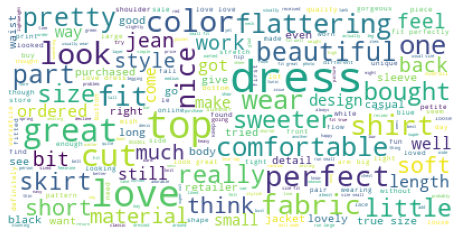

In [74]:
# wordcloud = WordCloud().generate(pos_words)

wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap=None).generate(pos_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

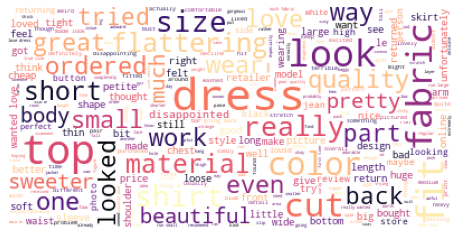

In [75]:
# wordcloud = WordCloud().generate(neg_words)

wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='magma_r').generate(neg_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

I want to remove words related to clothes because I find clothes-related word in the visualisation.

In [76]:
clothes = ['top', 'dress', 'blouse', 'shirt', 'skirt', 'jeans', 'jean', 'jumpsuit','color','camisole','sweater']
def remove_clothes(text):
    new_string=[]
    for word in text:
        if word not in clothes:
            new_string.append(word)
        else:
            pass
    return new_string

In [77]:
data['Text'] = data['Text'].apply(remove_clothes)

In [78]:
pos_df = data[data.Recommend== 1]
neg_df = data[data.Recommend== 0]

pos_words =[]
neg_words = []

for review in pos_df['Text']:
    for i in review:
        pos_words.append(i) 
pos_words = ' '.join(pos_words)
pos_words[:40]

for review in neg_df['Text']:
    for i in review:
        neg_words.append(i)
neg_words = ' '.join(neg_words)
neg_words[:500]

'look better photo returning immediately high hope sweeter found sale online jumped opportunity slender always wear small retailer purchased mint size small soon opened bag doubt fabric terrible thin scratch not soft supple imagined mint look faded shape awful length arm hit bizarre spot overall length sweeter cut tarso bit swing wanted like fabric nice thick found dipped low beneath armpit would ok last perfect shape give always found cut made mine look bit shaggy not heavy not great enough keep'

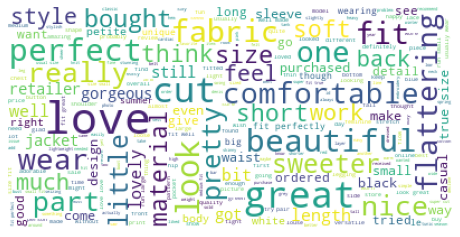

In [79]:
wordcloud = WordCloud(background_color="white",max_words=len(pos_words),\
                      max_font_size=40, relative_scaling=.5, colormap=None).generate(pos_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

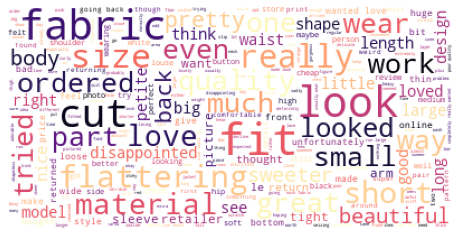

In [80]:
wordcloud = WordCloud(background_color="white",max_words=len(neg_words),\
                      max_font_size=40, relative_scaling=.5, colormap='magma_r').generate(neg_words)
plt.figure(figsize=(8,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Ada beberapa kata yang ternyata banyak muncul baik di Klasifikasi Recommended dan Not Recommended, misalnya kata Flattering, Great, Beautiful, Pretty. Sekilas jika dilihat kata yang kemunculannya berbeda dari dua kelas yaitu:
- Recommended: Comfortable, Perfect.
- Not Recommended: Disappointed, Unfortunately.

Ada juga kata yang sering dipakai di kedua kelas: Love, Flattering

Saya coba melihat jika menggunakan FreqDist

In [81]:
from nltk import FreqDist

In [82]:
fdist_pos = FreqDist(pos_words.split())

In [83]:
fdist_pos.most_common(20)

[('love', 2210),
 ('fit', 1968),
 ('size', 1777),
 ('not', 1766),
 ('great', 1608),
 ('wear', 1285),
 ('like', 1225),
 ('look', 1192),
 ('cut', 1186),
 ('small', 992),
 ('perfect', 965),
 ('would', 842),
 ('fabric', 838),
 ('little', 832),
 ('beautiful', 799),
 ('comfortable', 780),
 ('flattering', 779),
 ('soft', 764),
 ('really', 723),
 ('nice', 713)]

In [84]:
fdist_neg = FreqDist(neg_words.split())

In [85]:
fdist_neg.most_common(20)

[('not', 683),
 ('look', 400),
 ('like', 397),
 ('fit', 385),
 ('fabric', 308),
 ('would', 307),
 ('size', 282),
 ('cut', 263),
 ('love', 228),
 ('small', 224),
 ('back', 212),
 ('really', 211),
 ('wear', 183),
 ('ordered', 180),
 ('material', 165),
 ('flattering', 164),
 ('much', 161),
 ('quality', 157),
 ('short', 151),
 ('great', 150)]

### Making Text Matrix using TF-IDF

Selanjutnya data Text akan diolah dengan mengubah kata-kata menjadi feature, untuk kemudian dihitung beratnya berdasarkan perbandingan kemunculannya pada keseluruhan data.

Pertama-tama untuk menghitung rasio kemunculan setiap kata/terms (Terms Frequency or TF), data text akan diolah dengan menggunakan CountVectorizer. Selanjutnya baru dibandingkan dengan kemunculan pada text dan keseluruhan data (IDF) untuk mendapatkan rasionya, kemudian ditransform (TFIDF Transformer) untuk mendapatkan score weightnya (TF-IDF).

#### 1. CountVectorizer()

Pada hasil visualisasi word occurance sebelumnya, ditemukan beberapa kata yang sama-sama sering muncul pada kedua kelas (Flattering, Great, Beautiful, Love). Untuk itu pada tahap ini, saya mencoba menyeleksi terms menjadi unigram (per kata) dan bigram (gabungan 2-kata). Dengan harapan, munculnya susunan term baru seperti misalnya flattering menjadi not flattering, untuk membantu mengklasifikasi data.

Pada tahap ini saya juga akan set parameter max_df dan min_df, agar terms yang terlalu banyak/terlalu sedikit muncul tidak dihitung, sekaligus mengurangi size vocabulary (tidak terlalu banyak features).

In [86]:
## Vectorize ##
countvec = CountVectorizer(min_df=0.005, max_df=0.9, ngram_range=(1,2), tokenizer=lambda x: x, lowercase=False)
countvec.fit(data['Text'])

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=False, max_df=0.9, max_features=None, min_df=0.005,
                ngram_range=(1, 2), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=<function <lambda> at 0x0000028CAE4F4E58>,
                vocabulary=None)

In [87]:
# Getting the total n-gram count
len(countvec.vocabulary_)

1043

In [88]:
countvec.vocabulary_

{'price': 682,
 'look': 476,
 'amazing': 24,
 'every': 228,
 'curve': 166,
 'right': 736,
 'long': 470,
 'length': 439,
 'heel': 364,
 'like': 447,
 'leg': 437,
 'day': 177,
 'definitely': 182,
 'great': 343,
 'pair': 630,
 'totally': 921,
 'worth': 1022,
 'ordered': 611,
 'usual': 954,
 'size': 799,
 'fit': 276,
 'dream': 203,
 'hope': 382,
 'stretch': 854,
 'wearing': 992,
 'hour': 386,
 'amount': 25,
 'feel': 260,
 'nice': 566,
 'think': 901,
 'body': 87,
 'want': 973,
 'flare': 293,
 'wardrobe': 978,
 'look like': 481,
 'ordered usual': 619,
 'usual size': 955,
 'size fit': 800,
 'fit like': 281,
 'go': 329,
 'everything': 232,
 'beautifully': 67,
 'made': 512,
 'jacket': 409,
 'ended': 220,
 'buying': 105,
 'cream': 160,
 'yellow': 1038,
 'sold': 829,
 'probably': 684,
 'inside': 401,
 'silk': 793,
 'lining': 456,
 'pattern': 639,
 'fabric': 247,
 'weight': 998,
 'hang': 357,
 'without': 1011,
 'heavy': 363,
 'wear': 986,
 'medium': 530,
 'quality': 695,
 'open': 605,
 'shoulder':

Selanjutnya kita coba ubah document tersebut menjadi Bag of Words. Yaitu terms tsb akan dibuat menjadi masing-masing feature. Lalu bisa kita lihat sparsity datanya untuk melihat non zero values pada dataset.

In [89]:
countvec_count = countvec.transform(data['Text'])
print(countvec_count)

  (0, 24)	1
  (0, 25)	1
  (0, 87)	1
  (0, 166)	1
  (0, 177)	1
  (0, 182)	1
  (0, 203)	1
  (0, 228)	1
  (0, 260)	1
  (0, 276)	1
  (0, 281)	1
  (0, 293)	1
  (0, 343)	1
  (0, 364)	1
  (0, 382)	1
  (0, 386)	1
  (0, 437)	1
  (0, 439)	1
  (0, 447)	2
  (0, 470)	1
  (0, 476)	2
  (0, 481)	1
  (0, 566)	1
  (0, 611)	1
  (0, 619)	1
  :	:
  (4999, 411)	1
  (4999, 431)	1
  (4999, 458)	1
  (4999, 488)	1
  (4999, 508)	1
  (4999, 536)	1
  (4999, 552)	1
  (4999, 566)	1
  (4999, 576)	2
  (4999, 611)	2
  (4999, 615)	1
  (4999, 651)	2
  (4999, 653)	1
  (4999, 655)	1
  (4999, 760)	1
  (4999, 762)	1
  (4999, 768)	1
  (4999, 784)	1
  (4999, 799)	1
  (4999, 829)	1
  (4999, 847)	1
  (4999, 860)	1
  (4999, 864)	1
  (4999, 967)	1
  (4999, 992)	1


In [90]:
sparsity = (100.0 * countvec_count.nnz / (countvec_count.shape[0] * countvec_count.shape[1]))

print('sparse matrix shape:', countvec_count.shape)
print('nonzero count:', countvec_count.nnz)
print('sparsity: {}%'.format(round(sparsity,2)))

sparse matrix shape: (5000, 1043)
nonzero count: 122222
sparsity: 2.34%


#### 2. TF-IDF

Sekarang dihitung weightnya untuk setiap term pada document.

In [91]:
transformer = TfidfTransformer()
transformed_weights = transformer.fit_transform(countvec_count)
transformed_weights

<5000x1043 sparse matrix of type '<class 'numpy.float64'>'
	with 122222 stored elements in Compressed Sparse Row format>

In [92]:
print(transformed_weights.shape)

(5000, 1043)


In [93]:
print(transformed_weights[:1])

  (0, 1022)	0.15654497910087256
  (0, 992)	0.12586599572485346
  (0, 978)	0.17211759169299087
  (0, 973)	0.12226697945328319
  (0, 955)	0.16961183244107145
  (0, 954)	0.14602550341875148
  (0, 921)	0.18842046036393598
  (0, 901)	0.11775506829241442
  (0, 854)	0.27762490504200343
  (0, 800)	0.16028819267810432
  (0, 799)	0.07544566275056536
  (0, 736)	0.11722091465417905
  (0, 682)	0.13179365382575334
  (0, 630)	0.28700810589393116
  (0, 619)	0.19795908301337706
  (0, 611)	0.09904192947009653
  (0, 566)	0.10266993536393605
  (0, 481)	0.146200331785786
  (0, 476)	0.16392595580766375
  (0, 470)	0.11362843325366172
  (0, 447)	0.16114619431523872
  (0, 439)	0.11131907514850425
  (0, 437)	0.15750416657802693
  (0, 386)	0.20895482181491556
  (0, 382)	0.17324977603212216
  (0, 364)	0.17688771962317293
  (0, 343)	0.07883608894676085
  (0, 293)	0.17908773295024605
  (0, 281)	0.16961183244107145
  (0, 276)	0.06866080510565038
  (0, 260)	0.11900794147266942
  (0, 228)	0.15824145854961236
  (0, 203

Coba membuat dataframe baru agar bisa dilihat.

In [94]:
# Getting a list of all n-grams ##
transformed_weights = transformed_weights.toarray()

In [95]:
transformed_weights

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.20346732,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [96]:
vocab = countvec.get_feature_names()

In [97]:
vocab

['able',
 'absolutely',
 'absolutely love',
 'across',
 'actually',
 'add',
 'added',
 'addition',
 'adorable',
 'adore',
 'afraid',
 'agent',
 'ago',
 'agree',
 'agree review',
 'airy',
 'aline',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'amazing',
 'amount',
 'ankle',
 'another',
 'another reviewed',
 'anyone',
 'anything',
 'anyway',
 'appears',
 'appropriate',
 'area',
 'arm',
 'arm hole',
 'armhole',
 'around',
 'around waist',
 'arrived',
 'athletic',
 'athletic build',
 'attached',
 'attractive',
 'available',
 'average',
 'away',
 'awesome',
 'awful',
 'awkward',
 'b',
 'baby',
 'back',
 'bad',
 'bag',
 'baggy',
 'band',
 'bar',
 'barely',
 'based',
 'based review',
 'basic',
 'bc',
 'beach',
 'beading',
 'beautiful',
 'beautifully',
 'beauty',
 'believe',
 'bell',
 'belly',
 'belt',
 'best',
 'better',
 'better person',
 'big',
 'bigger',
 'bit',
 'bit large',
 'bit long',
 'bit small',
 'black',
 'black white',
 'blazed',
 'blue',
 'bodice',

Mencoba membuat dataframe baru berisi weights dari tiap kata, dengan menggabungkan data Transform Weight (untuk weightnya sebagai isian data) dan feature name (termsnya) menjadi kolom.

In [98]:
model = pd.DataFrame(transformed_weights, columns=vocab)

In [99]:
model.head()

,able,absolutely,absolutely love,across,actually,add,added,addition,adorable,adore,...,wrinkle,wrong,xx,year,year round,yellow,yes,yesterday,yet,zip
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.189177,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.202609,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0


In [100]:
#Take a while............ #
# Menambahkan Fitur Baru pada Dataframe

# Menambah feature Terms apa yang weightnya paling tinggi per review / axis=1
model['Keyword'] = model.idxmax(axis=1)

# Menambah feature weigthnya dari Terms yang paling tinggi per review / axis=1
model['Max'] = model.max(axis=1)

# Menambah feature total weighting per review.
model['Sum'] = model.drop('Max', axis=1).sum(axis=1)
model.head(10)

,able,absolutely,absolutely love,across,actually,add,added,addition,adorable,adore,...,year,year round,yellow,yes,yesterday,yet,zip,Keyword,Max,Sum
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,pair,0.287008,5.977791
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.189177,0.0,0.0,0.0,0.0,jacket,0.424656,4.240627
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,nice quality,0.345769,3.905294
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.202609,0.0,0.0,0.0,0.0,weight,0.314144,5.383182
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,sweeter,0.236796,5.941152
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,resistant,0.633229,2.277350
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,tank,0.379678,4.921036
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,body,0.260105,5.612678
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,paternity,0.290157,4.928576
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.232469,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,forward wearing,0.312159,4.181757


#### Merging Datasets

In [101]:
# Merging td-idf weight matrix with original DataFrame##
model = pd.merge(data, model, left_index=True, right_index=True)

In [102]:
model.head()

,Recommend,Review Text,Text,Polarity,able,absolutely,absolutely love,across,actually,add,...,year,year round,yellow,yes,yesterday,yet,zip,Keyword,Max,Sum
452,1,In love with this shirt I love this shirt so m...,"[love, love, much, give, bought, olive, green,...",0.025159,0.0,0.000000,0.00000,0.0,0.167492,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,short,0.365487,5.366272
1037,1,Classically byron lars Great fit even for bust...,"[classically, byron, law, great, fit, even, bu...",0.171111,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,petite,0.294856,4.908794
468,1,Pretty blouse This top is soo pretty with a co...,"[pretty, louse, pretty, cool, edge, it, look, ...",0.410000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,jacket,0.438028,5.346545
2100,0,Has anybody washed this shirt a second time? ...,"[anybody, washed, second, time, curious, conti...",-0.050000,0.0,0.000000,0.00000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,great fall,0.459703,4.730224
4704,1,This top is the bomb! I bought this top becaus...,"[bomb, bought, loved, flora, print, idea, gett...",0.472727,0.0,0.187683,0.22835,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,light,0.525724,4.261386


### Model Building Test

1    4108
0     892
Name: Recommend, dtype: int64


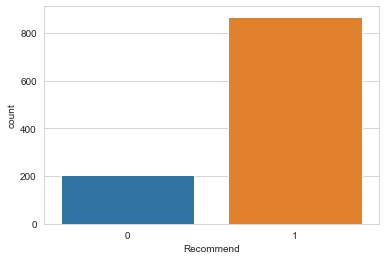

In [103]:
sns.countplot(x='Recommend', data = model)
print(data['Recommend'].value_counts())

Pertama saya coba melihat jumlah sample untuk masing-masing kelas. Ternyata terdapat ketidakseimbangan jumlah sample (imbalance data) antara kelas 0 dan kelas 1 di feature Recommend. Maka, pada pembuatan model berikutnya, saya akan melihat f1 score juga untuk evaluasi model performance.

#### Machine Learning Model Trial

In [104]:
from sklearn.model_selection import train_test_split

In [105]:
# Drop all columns not part of the text matrix
ml_model = model.drop(['Review Text', 'Text', 'Polarity', 'Keyword', 'Max', 'Sum'], axis=1)

# Create X & y variables for Machine Learning
X = ml_model.drop('Recommend', axis=1)
y = ml_model['Recommend']

# Create a train-test split of these variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

In [106]:
X.head()

,able,absolutely,absolutely love,across,actually,add,added,addition,adorable,adore,...,wrinkle,wrong,xx,year,year round,yellow,yes,yesterday,yet,zip
452,0.0,0.000000,0.00000,0.0,0.167492,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1037,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
468,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100,0.0,0.000000,0.00000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4704,0.0,0.187683,0.22835,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [107]:
y.head()

452     1
1037    1
468     1
2100    0
4704    1
Name: Recommend, dtype: int64

In [108]:
print('X Train Shape {}'.format(X_train.shape))
print('y Train Shape {}'.format(y_train.shape))
print('X Test Shape {}'.format(X_test.shape))
print('y Test Shape {}'.format(y_test.shape))

X Train Shape (752, 1043)
y Train Shape (752,)
X Test Shape (323, 1043)
y Test Shape (323,)


In [109]:
from sklearn.metrics import classification_report

In [110]:
# Defining a function to fit and predict ML algorithms
def model(mod, model_name, x_train, y_train, x_test, y_test):
    #fit model#
    modfit = mod.fit(x_train, y_train)
    
    #Print Report#
    predictions = modfit.predict(x_test)
    print(model_name)
    print("Classification Report \n",classification_report(predictions, y_test))

#### Test Model

In [111]:
# 1. Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
model(mnb, "Multinomial Naive Bayes", X_train, y_train, X_test, y_test)

Multinomial Naive Bayes
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.80      0.89       323

    accuracy                           0.80       323
   macro avg       0.50      0.40      0.44       323
weighted avg       1.00      0.80      0.89       323



In [113]:
# 2. Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
model(dt, "decision tree classifier", X_train, y_train, X_test, y_test)

decision tree classifier
Classification Report 
               precision    recall  f1-score   support

           0       0.23      0.20      0.21        75
           1       0.77      0.80      0.78       248

    accuracy                           0.66       323
   macro avg       0.50      0.50      0.50       323
weighted avg       0.64      0.66      0.65       323



Here I try to use Bagging trying to make the model stronger.

In [114]:
# 4. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc, "Random Forest Classifier", X_train, y_train, X_test, y_test)

Random Forest Classifier
Classification Report 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      0.80      0.89       322

    accuracy                           0.80       323
   macro avg       0.50      0.40      0.44       323
weighted avg       0.99      0.80      0.88       323



Evaluasi performance: Model dengan baik mengenali kelas 1, namun masih kurang untuk mengenali kelas 0. Besar kemungkinan karena adanya imbalance sample pada kedua kelas yang telah dibahas sebelumnya. Untuk itu saya coba memperbaiki model dengan teknik oversampling minority data, dalam hal ini kelas 0.

#### Oversampling using SMOTE

In [115]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority')
X_sm, y_sm = sm.fit_sample(X_train, y_train)

In [116]:
y_sm.value_counts()

1    611
0    611
Name: Recommend, dtype: int64

In [119]:
# 1. Multinomial Naive Bayes
model(mnb, "Multinomial Naive Bayes", X_sm, y_sm, X_test, y_test)

Multinomial Naive Bayes
Classification Report 
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       212
           1       0.75      0.87      0.80       155

    accuracy                           0.82       367
   macro avg       0.82      0.83      0.82       367
weighted avg       0.83      0.82      0.82       367



In [121]:
# 3. Decision Tree Classifier
model(dt, "decision tree classifier", X_sm, y_sm, X_test, y_test)

decision tree classifier
Classification Report 
               precision    recall  f1-score   support

           0       0.82      0.81      0.82       187
           1       0.81      0.81      0.81       180

    accuracy                           0.81       367
   macro avg       0.81      0.81      0.81       367
weighted avg       0.81      0.81      0.81       367



In [122]:
# Bagging - to make a stronger model.
# 5. Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
model(rfc, "Random Forest Classifier", X_sm, y_sm, X_test, y_test)

Random Forest Classifier
Classification Report 
               precision    recall  f1-score   support

           0       0.86      0.98      0.91       164
           1       0.98      0.87      0.92       203

    accuracy                           0.92       367
   macro avg       0.92      0.92      0.92       367
weighted avg       0.93      0.92      0.92       367



<b>Best Model</b>: RFC dengan data yang sudah di-oversampling.

In [3]:
## REVISI: Bisa tuning hyperparameter disini

Lalu hasil trial diterapkan untuk model yang akan di deploy pada Dash menggunakan Pipeline.

## Make Pipeline for Dash

In [123]:
import pickle
from sklearn.pipeline import Pipeline

In [124]:
data_new = data.copy()

In [125]:
msg_train, msg_test, label_train, label_test = \
train_test_split(data_new['Review Text'], data_new['Recommend'], test_size=0.3)

print(len(msg_train), len(msg_test), len(label_train), len(label_test))

3500 1500 3500 1500


In [126]:
label_train.value_counts()

1    2883
0     617
Name: Recommend, dtype: int64

In [127]:
# Cleaning Text #

def clean_process(text):
    #make lowercase
    clean_text = text.lower()

    #remove punctuation and numbers#
    clean_text = [char for char in clean_text if char not in string.punctuation]
    clean_text = [char for char in clean_text if char not in string.digits]
    clean_text = ''.join(clean_text)
    
    #remove spasi kelebihan di depan/akhir review#
    clean_text = clean_text.strip()
    
    #Spelling Correction#
    clean_text = TextBlob(clean_text).correct()

    #remove stopwords#
    clean_text = [word for word in clean_text.split(' ') if word not in stopwords.words('english')]
    clean_text = [word for word in clean_text if word not in new_stopwords]
    
    #make it whole again#
    clean_text = ' '.join(clean_text)
    
    #stringnya di-tokenize dulu menjadi token berupa kata (word token)#
    clean_text = clean_text.split()
    
    #setiap tokennya di lemmatize
    new_string=[]
    for word in clean_text:
        x_word = lemmatizer.lemmatize(word)
        new_string.append(x_word)
        
    return new_string

In [128]:
pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=clean_process, min_df=0.005, max_df=0.9, ngram_range=(1,2))), # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', RandomForestClassifier()), # train on TF-IDF vectors w/ classifier
])

In [129]:
model(pipeline, "Pipeline Test", msg_train, label_train, msg_train, label_train)

Pipeline Test
Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       617
           1       1.00      1.00      1.00      2883

    accuracy                           1.00      3500
   macro avg       1.00      1.00      1.00      3500
weighted avg       1.00      1.00      1.00      3500



Hasilnya terlalu bagus. Kita coba pada test data.

In [131]:
model(pipeline, "Pipeline Test", msg_train, label_train, msg_test, label_test)

Pipeline Test
Classification Report 
               precision    recall  f1-score   support

           0       0.25      0.77      0.38        90
           1       0.98      0.85      0.91      1410

    accuracy                           0.85      1500
   macro avg       0.62      0.81      0.65      1500
weighted avg       0.94      0.85      0.88      1500



Modelnya overfitting. Pada saat dicoba pada test data hasilnya kurang baik pada score precision di kelas 0. Mungkin karena adanya sample yang imbalance seperti yang dijelaskan sebelumnya.

In [139]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(sampling_strategy='minority')
# msg_sm, label_sm = sm.fit_sample(msg_train, label_train)

In [140]:
# String tidak bisa pakai teknik SMOTE/random

In [141]:
# from imblearn.over_sampling import RandomOverSampler
# ros = RandomOverSampler(random_state=42)
# X_res, y_res = ros.fit_resample(msg_train, label_train)

### GridSearch CV - Mencoba mencari parameter terbaik.

In [142]:
from sklearn.model_selection import GridSearchCV
parameter = {
    'bow__max_df': [0.8, 0.9],
    'bow__min_df': [1.0,0.005],
    'classifier__criterion': ['gini','entropy']
}

In [143]:
gs_pipe= GridSearchCV(pipeline, parameter, cv=3, n_jobs=-1)

In [ ]:
## too long to load........................
# gs_pipe = gs_pipe.fit(msg_train, label_train)

In [ ]:
# gs_pipe.best_params_

### Feature Importance

In [145]:
from eli5 import show_weights
from eli5.sklearn import PermutationImportance

In [161]:
rfc.fit(X_sm, y_sm)
perm = PermutationImportance(rfc, scoring='precision', random_state=101).fit(X_test,y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0198 ± 0.0106,long
0.0120 ± 0.0075,purchased
0.0119 ± 0.0135,ordered
0.0118 ± 0.0041,different
0.0115 ± 0.0044,one
0.0098 ± 0.0006,button
0.0093 ± 0.0005,layer
0.0087 ± 0.0005,interesting
0.0082 ± 0.0037,good
0.0063 ± 0.0092,like


In [162]:
perm = PermutationImportance(rfc, scoring='recall', random_state=101).fit(X_test,y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0099 ± 0.0083,long
0.0088 ± 0.0113,fit
0.0077 ± 0.0133,large
0.0077 ± 0.0054,button
0.0066 ± 0.0044,tarso
0.0066 ± 0.0129,one
0.0055 ± 0.0000,day
0.0055 ± 0.0000,jacket
0.0055 ± 0.0000,nice
0.0055 ± 0.0070,pretty


In [163]:
perm = PermutationImportance(rfc, scoring='accuracy', random_state=101).fit(X_test,y_test)
show_weights(perm, feature_names = list(X_test.columns))

Weight,Feature
0.0163 ± 0.0084,long
0.0098 ± 0.0065,one
0.0093 ± 0.0027,button
0.0087 ± 0.0072,purchased
0.0076 ± 0.0022,different
0.0071 ± 0.0027,fit
0.0065 ± 0.0027,layer
0.0060 ± 0.0080,large
0.0054 ± 0.0069,pretty
0.0054 ± 0.0034,good


<b> Insights:</b> Menggunakan Permutation Importance bisa melihat fitur/kata yang paling berpengaruh dalam menentukan,
- precision adalah :<b> long </b>
- recall adalah: <b> long </b>.
- accuracy adalah: <b> long </b>

### Cross Validation using K-Fold

In [151]:
from sklearn.model_selection import cross_val_score
from sklearn import metrics

In [153]:
precision = cross_val_score(rfc, X_sm, y_sm, cv=5, scoring='precision')

In [154]:
recall = cross_val_score(rfc, X_sm, y_sm, cv=5, scoring='recall')

In [155]:
accuracy = cross_val_score(rfc, X_sm, y_sm, cv=5, scoring='accuracy')

In [158]:
f1_scores = cross_val_score(rfc, X_sm, y_sm, cv=5, scoring='f1')

In [159]:
#make dataframe#
col = ['recall','precision','f1','accuracy']
d = [recall, precision, f1_scores, accuracy]

df_cv = pd.DataFrame(d,col).T
df_cv

,recall,precision,f1,accuracy
0,0.848837,0.901099,0.890173,0.918129
1,0.988372,0.923077,0.949721,0.953216
2,0.941860,0.852632,0.893855,0.877193
3,0.988372,0.884211,0.923913,0.929825
4,0.930233,0.880435,0.916201,0.900585


In [160]:
#make dataframe for mean score#
col = ['recall','precision','f1','accuracy']
d = [recall.mean(), precision.mean(), f1_scores.mean(), accuracy.mean()]

df_cv_mean = pd.DataFrame(d,col).T
df_cv_mean

,recall,precision,f1,accuracy
0,0.939535,0.888291,0.914773,0.915789


Dengan menerapkan CV-Kfold, bisa melihat apakah model yang dipilih sudah stabil. Kali ini dicoba dalam 5 kali iterasi (k=5 atau cv=5).

In [164]:
filename = 'pipeline_3.sav'
pickle.dump(pipeline, open(filename,'wb'))

## Dash Preparation

#### Export Dataframe (Sample 1000)

In [165]:
np.random.seed(101)
file = df.dropna().sample(1000)

In [166]:
file = file.drop(columns=['Unnamed: 0','Clothing ID','Title Character Count','Review Character Count','Division Name'], axis=1)
file.rename(columns = {'Recommended IND':'Recommend', 'Review Text': 'Review', 'Total Review Length': 'Review Length'}, inplace = True)

In [167]:
file.head(3)

,Age,Title,Review,Rating,Recommend,Positive Feedback Count,Department Name,Class Name,Review Length
22544,37,Better than i expected!!,These are colors i normally never wear...baby ...,5,1,4,Tops,Fine gauge,523
17382,37,Really cute!,"What a great, easy to wear jumpsuit! i love th...",5,1,1,Bottoms,Pants,297
14631,63,Design too fluorescent,I loved the lavender color on the cape. it was...,3,1,0,Intimate,Lounge,522


In [168]:
file['Recommend'] = file['Recommend'].apply(str)
file['Rating'] = file['Rating'].apply(str)

In [169]:
file.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 22544 to 3368
Data columns (total 9 columns):
Age                        1000 non-null int64
Title                      1000 non-null object
Review                     1000 non-null object
Rating                     1000 non-null object
Recommend                  1000 non-null object
Positive Feedback Count    1000 non-null int64
Department Name            1000 non-null object
Class Name                 1000 non-null object
Review Length              1000 non-null int64
dtypes: int64(3), object(6)
memory usage: 78.1+ KB


In [170]:
file.to_csv('df_sample.csv', index=False)

### Selesai.

In [ ]:
select * from dataframe;

In [ ]:
select rating, avg(age) as ratarataumur from dataframe group by rating;

In [ ]:
#color

#'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r',
#'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
#'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn',
#'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu',
#'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r',
#'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
#'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
#'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'cubehelix',
#'cubehelix_r', 'flag', 'flag_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r',
#'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 
#'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r',
#'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean',
#'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', '
#seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', '
#tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r',
#'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'
